<a href="https://colab.research.google.com/github/SircSibaja/Practica1_Lab/blob/main/Fuzzy_Inference_Systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Install the requiered libraries
!pip install FuzzySystem


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Enlace al proyecto: https://github.com/Raul-Navarro/fuzzy-framework

In [ ]:
import FuzzySystem as fs
import numpy as np


# Funciones de membresía

Una función de membresía representa el nivel de pertenencia de un elemento en un dominio de discurso en un universo.

Generalmente, se usan funciones parametrizadas, tales como: triangular, gaussiana, trapezoidal, entre otras; por su facilidad para representar comportamientos de grados de pertenencia comunes. 

## Funciones de membresía triangular 




Membership function: Triangular mf, Parameters: [1, 4, 7]


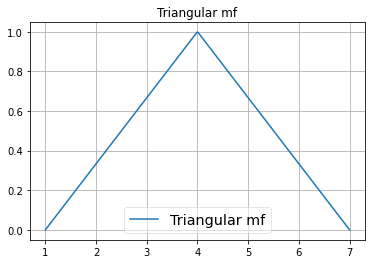

In [ ]:
trimf = fs.Trimf([1,4,7])
print(f"Membership function: {trimf.name}, Parameters: {trimf.params}")
trimf.show()


## Funciones de membresía gaussiana

Membership function: Gaussian mf, Parameters: [0.5, 1]


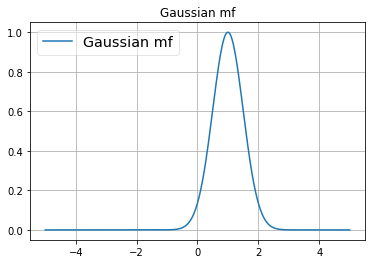

In [ ]:
gaussmf = fs.Gaussmf([.5,1], universe=[-5,5])
print(f"Membership function: {gaussmf.name}, Parameters: {gaussmf.params}")
gaussmf.show()


## Trapezoidal Membership function

Membership function: Trapezoidal mf, Parameters: [0, 2, 4, 6]


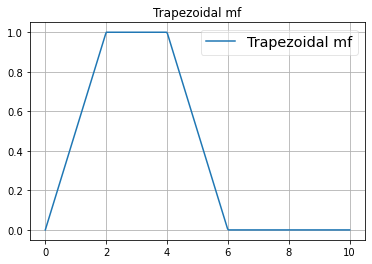

In [ ]:
trapmf = fs.Trapmf([0,2,4,6], universe=[0,10])
print(f"Membership function: {trapmf.name}, Parameters: {trapmf.params}")
trapmf.show()


# Construcción del sistema difuso usando la bibioteca fuzzy framework

*** Inputs ***
Service


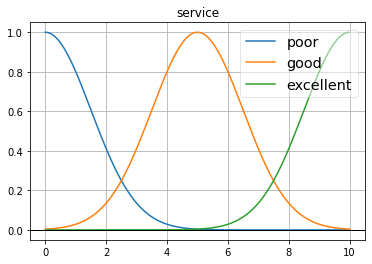

Food


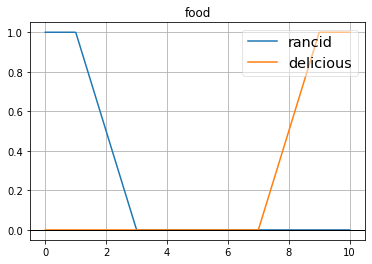

*** Outputs ***
Tip


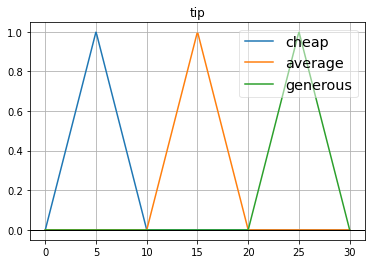

Inputs:
service: [8.183, 8.2]
food: [8.59, 4]
 IF service is poor and food is rancid THEN tip is cheap, fs = [0. 0.] with weight = 1.00
 IF service is good or food is delicious THEN tip is average, fs = [0.79 0.1 ] with weight = 1.00
 IF service is excellent or food is delicious THEN tip is generous, fs = [0.79 0.49] with weight = 1.00


In [ ]:
#INPUTS
print('*** Inputs ***')
service_poor = fs.FuzzySet('poor', fs.Gaussmf([1.5, 0]))
service_good = fs.FuzzySet('good', fs.Gaussmf([1.5, 5]))
service_excellent = fs.FuzzySet('excellent', fs.Gaussmf([1.5, 10]))
service = fs.FuzzyVariable('service',[service_poor, service_good, service_excellent], universe=[0, 10]) #Universe 0-10 rating points
print('Service')
service.show()

food_rancid = fs.FuzzySet('rancid', fs.Trapmf([0,0,1,3]))
food_delicious = fs.FuzzySet('delicious', fs.Trapmf([7,9,10,10]))
food = fs.FuzzyVariable('food', [food_rancid, food_delicious], universe=[0, 10]) #Universe 0-10 rating points
print('Food')
food.show()

#OUTPUT
print('*** Outputs ***')
tip_cheap = fs.FuzzySet('cheap', fs.Trimf([0,5,10]))
tip_avg = fs.FuzzySet('average', fs.Trimf([10,15,20]))
tip_generous = fs.FuzzySet('generous', fs.Trimf([20,25,30]))
tip = fs.FuzzyVariable('tip', [tip_cheap, tip_avg, tip_generous], universe=[0, 30]) #Universe 0-30 tip percentage 
print('Tip')
tip.show()

#RULES

## RULE 1
ant1  = fs.Antecedent(service['poor'], conector='min')
ant1.add(food['rancid'])
cont1 = fs.Consequent([tip['cheap']])
rule1 = fs.FuzzyRule(ant1, cont1)

## RULE 2
ant2  = fs.Antecedent(service['good'] | food['delicious'])
cont2 = fs.Consequent([tip['average']]) 
rule2 = fs.FuzzyRule(ant2, cont2)

## RULE 3
rule3 = fs.FuzzyRule(fs.Antecedent(service['excellent'] | food['delicious']),
                     fs.Consequent([ tip['generous'] ]))

#Building the FIS

fis = fs.FuzzyInferenceSystem([rule1, rule2, rule3], 
                              and_op='min',
                              or_op='max')

#FIS Evaluation
# TWO SETS OF INPUTS
## INPUT 1: service = 8.183 and food = 8.59 -> instance 0
## INPUT 2: service = 8.2 and food = 4 -> instance 1
inputs = {'service':[8.183, 8.2], 'food':[8.59,4]}
result = fis.eval(inputs, verbose=True)


# Defuzzificando la salida difusa



Defuzzification using a list of methods:
Instance: 0

Centroid=20.000
Center of Sets=20.000
Heights=19.986
Modified Heights=19.986
Mean Of Maximum=19.986
Least Of Maximum=25.960
First Of Maximum=14.011


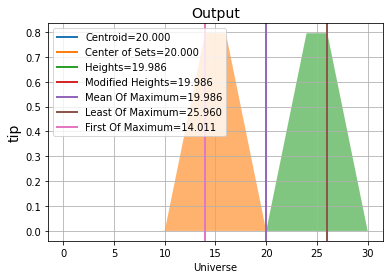

Instance: 1

Centroid=22.907
Center of Sets=23.257
Heights=23.233
Modified Heights=23.233
Mean Of Maximum=24.971
Least Of Maximum=27.507
First Of Maximum=22.436


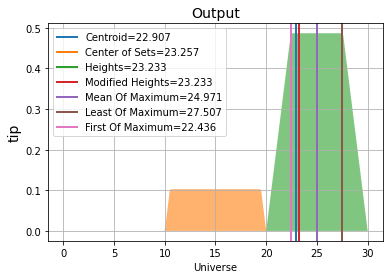

In [ ]:


print('Defuzzification using a list of methods:')


Defuzzification_methods = [fs.Centroid,
                           fs.CenterOfSets,  
                           fs.Heights, 
                           fs.ModifiedHeights, 
                           fs.MeanOfMaximum, 
                           fs.LastOfMaximum, 
                           fs.FirstOfMaximum]
#instances
for i in range(2):
    print("Instance: {}\n".format(i))
    result.show(Defuzzification_methods, nout=i)

